In [61]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
from collections import Counter

Text(0.5,1,'Original')

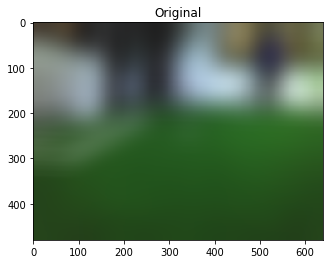

In [10]:
img = cv2.imread("testField.png")
blur =cv2.GaussianBlur(img,(155,155),0)
laplacian = cv2.Laplacian(blur,cv2.CV_64F)
plt.imshow(blur)
plt.title('Original')
# plt.show(blur)

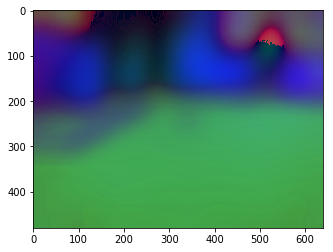

In [121]:
grey =  cv2.cvtColor(blur,cv2.COLOR_BGR2HSV)
plt.imshow(grey)
# laplacian = cv2.Laplacian(grey,cv2.CV_64F)
# plt.imshow(laplacian)
# plt.title('Original')
# print(laplacian)
# plt.show(blur)

In [124]:
def findgreen(image):
    thres = 70
    # find sample methods
    ys = np.random.choice(np.linspace(400,479,100),50)
    xs = np.random.choice(np.linspace(0,600,601),50)
    values = [tuple(image[int(ys[i]),int(xs[i])]) for i in range(50)]
    countVal = Counter(values)
    modus = countVal.most_common(1)[0][0]
    print(modus)
    minmod = tuple(np.array(modus) - thres)
    maxmod = tuple(np.array(modus) + thres)
    return image[image<maxmod and image>minmod]
#     nimage = image[:]
#     im_bw = cv2.threshold(image, thres, 255, cv2.THRESH_BINARY)[1]
#     for y,yval in enumerate(image):
#         for x in range(len(yval)):
#             rgb = image[y, x]
# #             print(rgb)
#             if rgb[0] < modus[0]-thres or rgb[0] > modus[0]+thres:
#                 nimage[y, x] = [0, 0, 0]
#             elif rgb[1] < modus[1]-thres or rgb[1] > modus[1]+thres:
#                 nimage[y, x] = [0, 0, 0]
#             elif rgb[0] < modus[2]-thres or rgb[2] > modus[2]+thres:
#                 nimage[y, x] = [0, 0, 0]
#             else:
#                 nimage[y, x] = [255, 255, 255]
#     return nimage

In [125]:
# print(np.random.choice(np.linspace(0,600,601),5))

plt.imshow(findgreen(grey))

(67, 154, 68)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()